In [1]:
#import pandas and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Load all data to pandas dataframe
df_horse=pd.read_csv("horseasses-population-in-nepal-by-district.csv")
df_milk=pd.read_csv("milk-animals-and-milk-production-in-nepal-by-district.csv")
df_meat=pd.read_csv("net-meat-production-in-nepal-by-district.csv")
df_cotton=pd.read_csv("production-of-cotton-in-nepal-by-district.csv")
df_egg=pd.read_csv("production-of-egg-in-nepal-by-district.csv")
df_rabbit=pd.read_csv("rabbit-population-in-nepal-by-district.csv")
df_wool=pd.read_csv("wool-production-in-nepal-by-district.csv")
df_yak=pd.read_csv("yak-nak-chauri-population-in-nepal-by-district.csv")

In [3]:
#Check if Columns needs to be renamed to suitable Names. Make District column same name on all dataframe
print("Before Renaming: ",df_horse.columns)
print("Before Renaming: ",df_milk.columns)
print("Before Renaming: ",df_meat.columns)
print("Before Renaming: ",df_cotton.columns)
print("Before Renaming: ",df_egg.columns)
print("Before Renaming: ",df_rabbit.columns)
print("Before Renaming: ",df_wool.columns)
print("Before Renaming: ",df_yak.columns)

Before Renaming:  Index(['DISTRICT', 'Horses/Asses'], dtype='object')
Before Renaming:  Index(['DISTRICT', 'MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'COW MILK',
       'BUFF MILK', 'TOTAL MILK PRODUCED'],
      dtype='object')
Before Renaming:  Index(['DISTRICT', 'BUFF', 'MUTTON', 'CHEVON', 'PORK ', 'CHICKEN', 'DUCK MEAT',
       'TOTAL MEAT'],
      dtype='object')
Before Renaming:  Index(['DISTRICT', 'AREA (Ha.)', 'PROD. (Mt.)', 'YIELD Kg/Ha'], dtype='object')
Before Renaming:  Index(['DISTRICT', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG',
       'TOTAL EGG'],
      dtype='object')
Before Renaming:  Index(['DISTRICT', 'Rabbit'], dtype='object')
Before Renaming:  Index(['DISTRICT', 'SHEEPS NO.', 'SHEEP WOOL PRODUCED'], dtype='object')
Before Renaming:  Index(['DISTRICT', 'YAK/NAK/CHAURI'], dtype='object')


In [4]:
#Rename df_meat dataframe columns
df_meat = df_meat.rename(columns={"BUFF": "BUFF MEAT","MUTTON":"MUTTON MEAT","CHEVON":"CHEVON MEAT","PORK":"PORKMEAT","CHICKEN":"CHICKEN MEAT"})
df_meat.columns

Index(['DISTRICT', 'BUFF MEAT', 'MUTTON MEAT', 'CHEVON MEAT', 'PORK ',
       'CHICKEN MEAT', 'DUCK MEAT', 'TOTAL MEAT'],
      dtype='object')

In [5]:
#Rename df_rabbit
df_rabbit = df_rabbit.rename(columns={"Rabbit":"RABBIT"})
df_rabbit.columns

Index(['DISTRICT', 'RABBIT'], dtype='object')

In [6]:
# Convert all District column to UPPER Case
df_horse["DISTRICT"] = [x.upper() for x in df_horse["DISTRICT"]]
df_milk["DISTRICT"] =[x.upper() for x in df_milk["DISTRICT"]]
df_meat["DISTRICT"] = [x.upper() for x in df_meat["DISTRICT"]]
df_cotton["DISTRICT"] = [x.upper() for x in df_cotton["DISTRICT"]]
df_egg["DISTRICT"] = [x.upper() for x in df_egg["DISTRICT"]]
df_rabbit["DISTRICT"] = [x.upper() for x in df_rabbit["DISTRICT"]]
df_wool["DISTRICT"] = [x.upper() for x in df_wool["DISTRICT"]]
df_yak["DISTRICT"] = [x.upper() for x in df_yak["DISTRICT"]]

In [7]:
# Remove region and Totals from DataFrame and store it on seperate dataframe
def is_district_region(value):
    if value.startswith('C.'):
        return True
    elif value.startswith("E."):
        return True
    elif value.startswith("FW."):
        return True
    elif value.startswith("MW."):
        return True
    elif value.startswith("W."):
        return True
    elif value.startswith("TOTAL"):
        return True
    elif value.startswith("NEPAL"):
        return True
    else:
        return False

region_df_horse=df_horse[pd.Series([is_district_region(x) for x in df_horse["DISTRICT"]])].copy()
df_horse_district_only=df_horse.drop(region_df_horse.index)

region_df_milk=df_milk[pd.Series([is_district_region(x) for x in df_milk["DISTRICT"]])].copy()
df_milk_district_only=df_milk.drop(region_df_milk.index)

region_df_meat=df_meat[pd.Series([is_district_region(x) for x in df_meat["DISTRICT"]])].copy()
df_meat_district_only=df_meat.drop(region_df_meat.index)

region_df_cotton=df_cotton[pd.Series([is_district_region(x) for x in df_cotton["DISTRICT"]])].copy()
df_cotton_district_only=df_cotton.drop(region_df_cotton.index)

region_df_egg=df_egg[pd.Series([is_district_region(x) for x in df_egg["DISTRICT"]])].copy()
df_egg_district_only=df_egg.drop(region_df_egg.index)

region_df_rabbit=df_rabbit[pd.Series([is_district_region(x) for x in df_rabbit["DISTRICT"]])].copy()
df_rabbit_district_only=df_rabbit.drop(region_df_rabbit.index)

region_df_wool=df_wool[pd.Series([is_district_region(x) for x in df_wool["DISTRICT"]])].copy()
df_wool_district_only=df_wool.drop(region_df_wool.index)

region_df_yak=df_yak[pd.Series([is_district_region(x) for x in df_yak["DISTRICT"]])].copy()
df_yak_district_only=df_yak.drop(region_df_yak.index)

In [8]:
# Transform district columns name to be same name for 
# “SANKHUWASABHA” == “SANKHUWASHAVA” && “TERATHUM”==”TERHATHUM” && “RAMECHAP'”=”RAMECHHAP”
df_horse_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_milk_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_meat_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_cotton_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_egg_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_rabbit_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_wool_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)
df_yak_district_only["DISTRICT"].replace({"SANKHUWASABHA": "SANKHUWASHAVA","TERATHUM":"TERHATHUM","RAMECHAP":"RAMECHHAP"},inplace=True)

In [9]:
#Merge Regions data into dataframe all_livestock_region
region_df_horse["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_milk["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_meat["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_cotton["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_egg["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_rabbit["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_wool["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)
region_df_yak["DISTRICT"].replace({"E.REGION": "E. REGION","C.REGION":"C. REGION","W.REGION":"W. REGION","MW.REGION":"MW. REGION","FW.REGION":"FW. REGION"},inplace=True)

all_livestock_region = pd.merge(region_df_horse,region_df_milk,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_meat,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_cotton,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_egg,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_rabbit,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_wool,on="DISTRICT",how="outer").fillna(0)\
.merge(region_df_yak,on="DISTRICT",how="outer").fillna(0)
pd.set_option('display.max_columns', None)

#Remove total and nepal column
all_livestock_region.drop(all_livestock_region[all_livestock_region["DISTRICT"]=="TOTAL"].index,inplace=True)
all_livestock_region.drop(all_livestock_region[all_livestock_region["DISTRICT"]=="NEPAL"].index,inplace=True)
all_livestock_region.head(30)

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF MEAT,MUTTON MEAT,CHEVON MEAT,PORK,CHICKEN MEAT,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,RABBIT,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,E. REGION,7616.0,332384.0,292178.0,196708.0,263199.0,459907.0,41220.0,269.0,15729.0,10195.0,8811.0,89.0,76313.0,0.0,0.0,0.0,1780554.06,60193.0,214241.0,4712.0,218953.0,5124.0,79815.0,58002.0,22797.0
1,C. REGION,1468.0,263728.0,377741.0,177815.0,358483.0,536299.0,50244.0,256.0,16893.0,4432.0,28728.0,67.0,100620.0,0.0,0.0,0.0,7118554.32,49572.0,756783.0,3907.0,760690.0,5304.0,77126.0,57295.0,12484.0
2,W. REGION,7789.0,154560.0,341323.0,105190.0,315616.0,420806.0,40476.0,561.0,12540.0,4127.0,9414.0,65.0,67183.0,0.0,0.0,0.0,1745955.36,54256.0,163058.0,3963.0,167021.0,8915.0,144089.0,101731.0,14823.0
3,MW. REGION,35124.0,144868.0,211885.0,76157.0,160705.0,236862.0,24911.0,1263.0,13528.0,3770.0,5354.0,10.0,48836.0,0.0,0.0,0.0,1170714.06,10534.0,119341.0,820.0,120161.0,11483.0,397057.0,295006.0,17835.0
4,FW. REGION,3811.0,130595.0,132257.0,87936.0,112438.0,200374.0,18154.0,335.0,6893.0,985.0,2734.0,6.0,29107.0,0.0,0.0,0.0,537737.00,6372.0,40743.0,504.0,41247.0,1387.0,102571.0,76314.0,892.0
6,E.MOUNTAIN,0.0,31284.0,31855.0,15324.0,20339.0,35663.0,3376.0,100.0,1865.0,1380.0,640.0,1.0,7362.0,0.0,0.0,0.0,135548.00,1180.0,10271.0,87.0,10358.0,0.0,26419.0,18855.0,0.0
7,E.HILLS,0.0,123976.0,109431.0,74587.0,95837.0,170424.0,15440.0,146.0,5484.0,5287.0,2372.0,9.0,28738.0,0.0,0.0,0.0,549366.00,5916.0,78878.0,458.0,79336.0,0.0,46238.0,33361.0,0.0
8,E.TERAI,0.0,177124.0,150892.0,106797.0,147023.0,253820.0,22404.0,23.0,8380.0,3528.0,5799.0,79.0,40213.0,0.0,0.0,0.0,1095640.00,53097.0,125092.0,4167.0,129259.0,0.0,7158.0,5786.0,0.0
9,C.MOUNTAIN,0.0,21380.0,32607.0,13173.0,30261.0,43434.0,4486.0,85.0,1821.0,344.0,1046.0,3.0,7785.0,0.0,0.0,0.0,232271.00,3423.0,16482.0,265.0,16747.0,0.0,25100.0,18649.0,0.0
10,C.HILLS,0.0,125519.0,187803.0,78958.0,187149.0,266107.0,23305.0,147.0,6777.0,2345.0,14123.0,18.0,46715.0,0.0,0.0,0.0,3222902.00,17417.0,276415.0,1338.0,277753.0,0.0,44251.0,32874.0,0.0


In [10]:
all_livestock_region.columns

Index(['DISTRICT', 'Horses/Asses', 'MILKING  COWS NO.',
       'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK',
       'TOTAL MILK PRODUCED', 'BUFF MEAT', 'MUTTON MEAT', 'CHEVON MEAT',
       'PORK ', 'CHICKEN MEAT', 'DUCK MEAT', 'TOTAL MEAT', 'AREA (Ha.)',
       'PROD. (Mt.)', 'YIELD Kg/Ha', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG',
       'DUCK EGG', 'TOTAL EGG', 'RABBIT', 'SHEEPS NO.', 'SHEEP WOOL PRODUCED',
       'YAK/NAK/CHAURI'],
      dtype='object')

In [11]:
#Merge Disctrict data into dataframe all_livestock_region
all_livestock_district = pd.merge(df_horse_district_only,df_milk_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_meat_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_cotton_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_egg_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_rabbit_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_wool_district_only,on="DISTRICT",how="outer").fillna(0)\
.merge(df_yak_district_only,on="DISTRICT",how="outer").fillna(0)
pd.set_option('display.max_columns', None)
all_livestock_district.head(10)

,DISTRICT,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF MEAT,MUTTON MEAT,CHEVON MEAT,PORK,CHICKEN MEAT,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,RABBIT,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,0.0,0.0,0.0,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,0.0,0.0,0.0,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,0.0,0.0,0.0,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,0.0,0.0,0.0,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,0.0,0.0,0.0,26781.0,332,6656,27,6683,240.0,160,118,165.0
5,TERHATHUM,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,0.0,0.0,0.0,26030.0,514,3000,39,3039,206.0,7083,5262,0.0
6,BHOJPUR,168.0,14103,16342,7324,14184,21508.0,1251,51,313,919,251,2,2787,0.0,0.0,0.0,53957.0,1136,4037,88,4125,42.0,18210,13530,887.0
7,KHOTANG,350.0,12998,19501,7105,12275,19380.0,1997,31,442,705,310,1,3486,0.0,0.0,0.0,50271.0,354,4310,27,4337,100.0,9156,5925,350.0
8,OKHALDHUNGA,102.0,7930,11693,4555,5516,10071.0,1497,31,685,751,294,0,3258,0.0,0.0,0.0,59344.0,445,3296,33,3329,645.0,9105,6756,675.0
9,UDAYAPUR,1302.0,15867,26138,9092,22687,31779.0,3346,2,1430,818,578,2,6176,0.0,0.0,0.0,148326.0,1474,50120,116,50236,1217.0,609,452,0.0


In [12]:
pd.set_option('display.max_rows', 105)
all_districts=np.sort(all_livestock_district["DISTRICT"].unique())
print(all_districts)
print("Total Disctrict: ",len(all_districts))

['ACHHAM' 'ARGHAKHANCHI' 'BAGLUNG' 'BAITADI' 'BAJHANG' 'BAJURA' 'BANKE'
 'BARA' 'BARDIYA' 'BHAKTAPUR' 'BHOJPUR' 'CHITWAN' 'DADELDHURA' 'DAILEKH'
 'DANG' 'DARCHULA' 'DHADING' 'DHANKUTA' 'DHANUSHA' 'DOLAKHA' 'DOLPA'
 'DOTI' 'GORKHA' 'GULMI' 'HUMLA' 'ILLAM' 'JAJARKOT' 'JHAPA' 'JUMLA'
 'KAILALI' 'KALIKOT' 'KANCHANPUR' 'KAPILBASTU' 'KASKI' 'KATHMANDU' 'KAVRE'
 'KHOTANG' 'LALITPUR' 'LAMJUNG' 'MAHOTTARI' 'MAKWANPUR' 'MANANG' 'MORANG'
 'MUGU' 'MUSTANG' 'MYAGDI' 'NAWALPARASI' 'NUWAKOT' 'OKHALDHUNGA' 'PALPA'
 'PANCHTHAR' 'PARBAT' 'PARSA' 'PYUTHAN' 'RAMECHHAP' 'RASUWA' 'RAUTAHAT'
 'ROLPA' 'RUKUM' 'RUPANDEHI' 'SALYAN' 'SANKHUWASHAVA' 'SAPTARI' 'SARLAHI'
 'SINDHULI' 'SINDHUPALCHOK' 'SIRAHA' 'SOLUKHUMBU' 'SUNSARI' 'SURKHET'
 'SYANGJA' 'TANAHU' 'TAPLEJUNG' 'TERHATHUM' 'UDAYAPUR']
Total Disctrict:  75


In [13]:
all_livestock_district.corr()

,Horses/Asses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF MEAT,MUTTON MEAT,CHEVON MEAT,PORK,CHICKEN MEAT,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,RABBIT,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
Horses/Asses,1.000000,-0.279463,-0.322407,-0.285381,-0.318752,-0.333573,-0.391602,0.663637,-0.274711,-0.236362,-0.211937,-0.227930,-0.355657,0.029650,0.094356,0.174986,-0.179318,-0.199555,-0.131001,-0.203148,-0.132193,0.091906,0.681722,0.683817,0.312543
MILKING COWS NO.,-0.279463,1.000000,0.568883,0.902348,0.540606,0.729867,0.711038,-0.270036,0.607954,0.503541,0.244728,0.676762,0.628162,0.063592,0.060166,0.041336,0.187321,0.668618,0.133355,0.683424,0.137634,-0.039467,-0.255380,-0.258608,-0.290556
MILKING BUFFALOES NO.,-0.322407,0.568883,1.000000,0.565044,0.777311,0.762105,0.860135,-0.169038,0.632476,0.327530,0.290638,0.495733,0.712020,0.182173,0.215723,0.234004,0.237565,0.509672,0.135579,0.506436,0.138717,-0.001810,-0.213361,-0.224044,-0.322232
COW MILK,-0.285381,0.902348,0.565044,1.000000,0.664886,0.854584,0.779079,-0.278308,0.584429,0.480617,0.360445,0.618412,0.705138,0.028246,0.029337,0.035278,0.309148,0.616640,0.230890,0.633195,0.234761,-0.056182,-0.286733,-0.291490,-0.303395
BUFF MILK,-0.318752,0.540606,0.777311,0.664886,1.000000,0.956100,0.828175,-0.264192,0.602445,0.331889,0.407543,0.465554,0.739227,0.063677,0.101656,0.180229,0.403541,0.422742,0.284940,0.427796,0.287442,0.036466,-0.325362,-0.332385,-0.354898
TOTAL MILK PRODUCED,-0.333573,0.729867,0.762105,0.854584,0.956100,1.000000,0.881438,-0.292865,0.648134,0.419302,0.424755,0.566292,0.790589,0.055353,0.082186,0.139145,0.401847,0.535832,0.288688,0.545841,0.291946,0.003312,-0.338699,-0.345448,-0.365772
BUFF MEAT,-0.391602,0.711038,0.860135,0.779079,0.828175,0.881438,1.000000,-0.250610,0.721056,0.464644,0.527985,0.637701,0.914056,0.117570,0.130349,0.138567,0.479426,0.558661,0.399311,0.570969,0.402634,0.046211,-0.293950,-0.301230,-0.364949
MUTTON MEAT,0.663637,-0.270036,-0.169038,-0.278308,-0.264192,-0.292865,-0.250610,1.000000,-0.187381,-0.177442,-0.143979,-0.162199,-0.227641,0.218067,0.200784,0.087595,-0.117918,-0.191762,-0.100732,-0.199070,-0.101925,0.081556,0.967302,0.966662,0.212044
CHEVON MEAT,-0.274711,0.607954,0.632476,0.584429,0.602445,0.648134,0.721056,-0.187381,1.000000,0.411703,0.392021,0.496475,0.765010,0.555065,0.552914,0.405594,0.342484,0.466250,0.327792,0.482623,0.330610,0.066623,-0.193256,-0.197802,-0.318184
PORK,-0.236362,0.503541,0.327530,0.480617,0.331889,0.419302,0.464644,-0.177442,0.411703,1.000000,0.258450,0.436042,0.520238,0.192203,0.214158,0.222657,0.227272,0.270870,0.220708,0.278944,0.222309,0.132487,-0.196362,-0.196472,-0.143449


In [14]:
all_livestock_district.columns

Index(['DISTRICT', 'Horses/Asses', 'MILKING  COWS NO.',
       'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK',
       'TOTAL MILK PRODUCED', 'BUFF MEAT', 'MUTTON MEAT', 'CHEVON MEAT',
       'PORK ', 'CHICKEN MEAT', 'DUCK MEAT', 'TOTAL MEAT', 'AREA (Ha.)',
       'PROD. (Mt.)', 'YIELD Kg/Ha', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG',
       'DUCK EGG', 'TOTAL EGG', 'RABBIT', 'SHEEPS NO.', 'SHEEP WOOL PRODUCED',
       'YAK/NAK/CHAURI'],
      dtype='object')

Text(0.5, 1.0, 'Scatter Plot between Total Milk Produced And Total number of Buff & Cows')

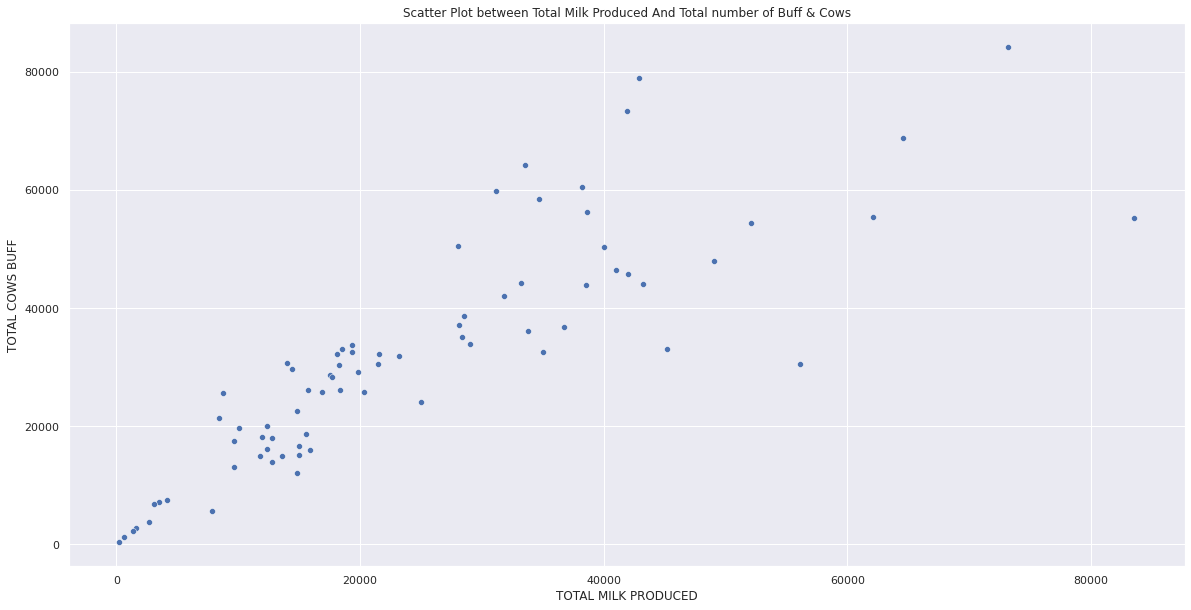

In [15]:
#Scatter Plot to between total milk produced and total cows and Buffalos
all_livestock_district["TOTAL COWS BUFF"] = all_livestock_district["MILKING  COWS NO."] + all_livestock_district["MILKING  BUFFALOES NO."]
plt.figure(figsize=(20,10))
scatter_plot=sns.scatterplot(x="TOTAL MILK PRODUCED", y="TOTAL COWS BUFF", data=all_livestock_district)
scatter_plot.set_title("Scatter Plot between Total Milk Produced And Total number of Buff & Cows")

In [16]:
#Corelatoin between total milk produced and total number of cows/buffalo
all_livestock_district["TOTAL MILK PRODUCED"].corr(all_livestock_district["TOTAL COWS BUFF"])

0.8427367781740117

Text(0.5, 1.0, 'Bar Diagram of total milk producted on different Regions of Nepal')

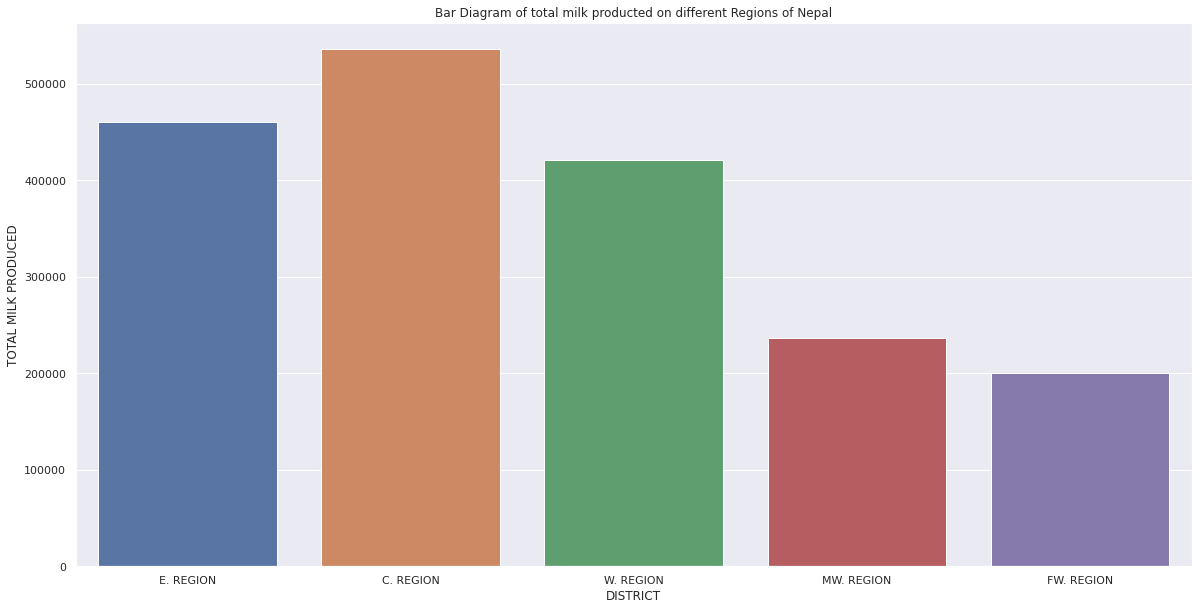

In [21]:
#Barplot to find total milk produced thoughout the region
plt.figure(figsize=(20,10))
regions=["E. REGION","C. REGION","W. REGION","MW. REGION","FW. REGION"]
bar_plot=sns.barplot(x="DISTRICT", y="TOTAL MILK PRODUCED", data=all_livestock_region,order=regions)
bar_plot.set_title("Bar Diagram of total milk producted on different Regions of Nepal")

In [18]:
all_livestock_district["TOTAL EGG"]

0       2445
1       5540
2       2373
3       5600
4       6683
5       3039
6       4125
7       4337
8       3329
9      50236
10     28868
11     33652
12     30118
13     26324
14      8099
15     10582
16    412175
17       211
18       406
19      4630
20      7462
21     14376
22     43151
23      6777
24      6065
25      3119
26      2303
27      3857
28      7296
29     41946
30     10582
31      5700
32       271
33       603
34       471
35       448
36       609
37      2982
38      3322
39      4026
40      3913
41      2303
42      6802
43     10687
44     55047
45     13128
46     15549
47       867
48       999
49       784
50      1914
51      3629
52       600
53      1613
54      1987
55     19142
56     17479
57      8195
58      7590
59       962
60      6526
61      7858
62     35988
63     40995
64     32246
65     41233
66     28477
67     58106
68      8945
69     10084
70      5831
71     10474
72      9140
73     17203
74     13638
Name: TOTAL EGG, dtype: i

Text(0.5, 1.0, 'HeatMap of corelation between Hen Egg, Duck Egg and Total Egg')

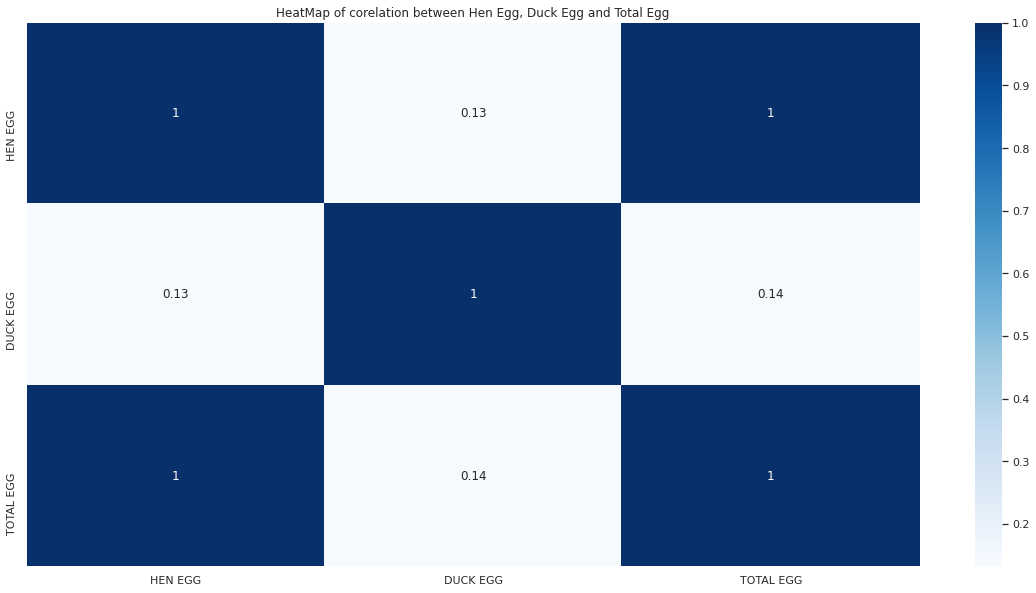

In [22]:
#HeatMap plot of correlation between Hen Egg, Duck Egg, Total Egg
plt.figure(figsize=(20,10))
coeffs=all_livestock_district[['HEN EGG', 'DUCK EGG','TOTAL EGG']].corr()
heat_map=sns.heatmap(coeffs, annot=True, cmap="Blues")
heat_map.set_title("HeatMap of corelation between Hen Egg, Duck Egg and Total Egg")

Text(0.5, 1.0, 'Bar Diagram of total Egg produced on different Regions of Nepal')

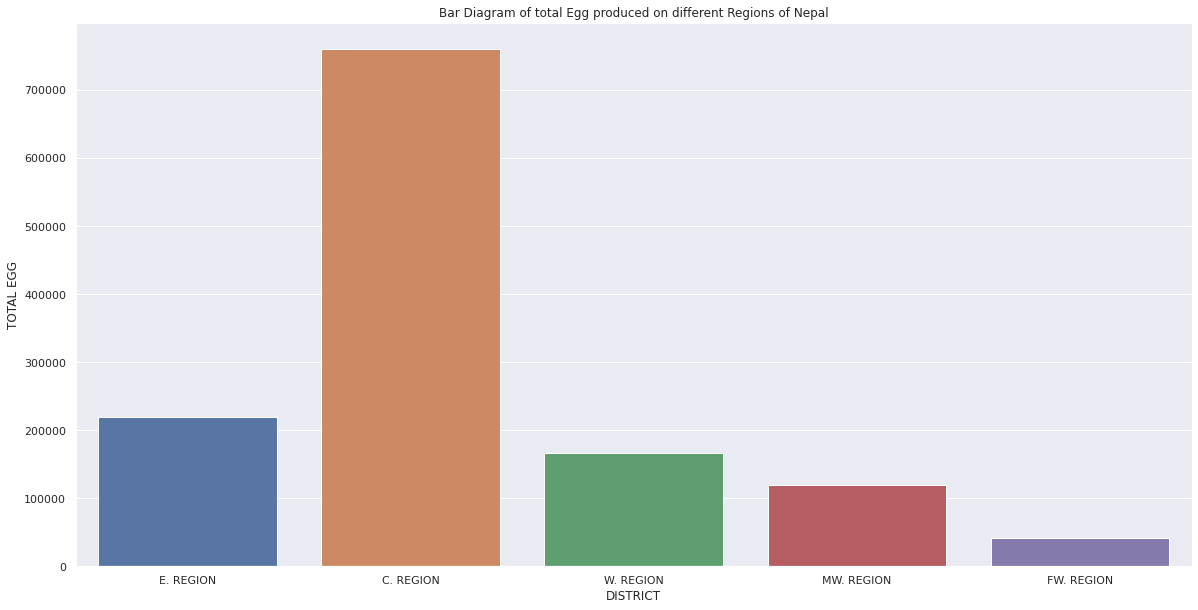

In [20]:
#Barplot to find total milk produced thoughout the region
plt.figure(figsize=(20,10))
regions=["E. REGION","C. REGION","W. REGION","MW. REGION","FW. REGION"]
bar_plot=sns.barplot(x="DISTRICT", y="TOTAL EGG", data=all_livestock_region,order=regions)
bar_plot.set_title("Bar Diagram of total Egg produced on different Regions of Nepal")